In [1]:
pip install ucimlrepo

Note: you may need to restart the kernel to use updated packages.


In [2]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
bank_marketing = fetch_ucirepo(id=222) 
  
# data (as pandas dataframes) 
X = bank_marketing.data.features 
y = bank_marketing.data.targets 
  
# metadata 
print(bank_marketing.metadata) 
  
# variable information 
print(bank_marketing.variables) 


{'uci_id': 222, 'name': 'Bank Marketing', 'repository_url': 'https://archive.ics.uci.edu/dataset/222/bank+marketing', 'data_url': 'https://archive.ics.uci.edu/static/public/222/data.csv', 'abstract': 'The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe a term deposit (variable y).', 'area': 'Business', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 45211, 'num_features': 16, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Age', 'Occupation', 'Marital Status', 'Education Level'], 'target_col': ['y'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 2014, 'last_updated': 'Fri Aug 18 2023', 'dataset_doi': '10.24432/C5K306', 'creators': ['S. Moro', 'P. Rita', 'P. Cortez'], 'intro_paper': {'title': 'A data-driven approach to predict the success of bank telemarketing'

In [24]:
X

,age,job,marital,education,default,balance,housing,loan,contact,day_of_week,month,duration,campaign,pdays,previous,poutcome
0,58,management,married,tertiary,no,2143,yes,no,NaN,5,may,261,1,-1,0,NaN
1,44,technician,single,secondary,no,29,yes,no,NaN,5,may,151,1,-1,0,NaN
2,33,entrepreneur,married,secondary,no,2,yes,yes,NaN,5,may,76,1,-1,0,NaN
3,47,blue-collar,married,NaN,no,1506,yes,no,NaN,5,may,92,1,-1,0,NaN
4,33,NaN,single,NaN,no,1,no,no,NaN,5,may,198,1,-1,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,NaN
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,NaN
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,NaN


In [25]:
y

0        0
1        0
2        0
3        0
4        0
        ..
45206    1
45207    1
45208    1
45209    0
45210    0
Name: y_yes, Length: 45211, dtype: uint8

In [19]:
# import all library to requreted
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,precision_score,recall_score
import pickle

In [20]:
# concatenating X and y along columns"
df = pd.concat([X, y], axis=1)

In [21]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day_of_week,month,duration,campaign,pdays,previous,poutcome,y_yes
0,58,management,married,tertiary,no,2143,yes,no,NaN,5,may,261,1,-1,0,NaN,0
1,44,technician,single,secondary,no,29,yes,no,NaN,5,may,151,1,-1,0,NaN,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,NaN,5,may,76,1,-1,0,NaN,0
3,47,blue-collar,married,NaN,no,1506,yes,no,NaN,5,may,92,1,-1,0,NaN,0
4,33,NaN,single,NaN,no,1,no,no,NaN,5,may,198,1,-1,0,NaN,0


In [22]:
df.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day_of_week,month,duration,campaign,pdays,previous,poutcome,y_yes
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,NaN,1
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,NaN,1
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,1
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,NaN,0
45210,37,entrepreneur,married,secondary,no,2971,no,no,cellular,17,nov,361,2,188,11,other,0


In [9]:
df.shape

(45211, 17)

In [10]:
df=df.fillna(df.mean())
df=pd.get_dummies(df)
print(df.columns)

Index(['age', 'balance', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired', 'job_self-employed',
       'job_services', 'job_student', 'job_technician', 'job_unemployed',
       'marital_divorced', 'marital_married', 'marital_single',
       'education_primary', 'education_secondary', 'education_tertiary',
       'default_no', 'default_yes', 'housing_no', 'housing_yes', 'loan_no',
       'loan_yes', 'contact_cellular', 'contact_telephone', 'month_apr',
       'month_aug', 'month_dec', 'month_feb', 'month_jan', 'month_jul',
       'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct',
       'month_sep', 'poutcome_failure', 'poutcome_other', 'poutcome_success',
       'y_no', 'y_yes'],
      dtype='object')


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 49 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   age                  45211 non-null  int64
 1   balance              45211 non-null  int64
 2   day_of_week          45211 non-null  int64
 3   duration             45211 non-null  int64
 4   campaign             45211 non-null  int64
 5   pdays                45211 non-null  int64
 6   previous             45211 non-null  int64
 7   job_admin.           45211 non-null  uint8
 8   job_blue-collar      45211 non-null  uint8
 9   job_entrepreneur     45211 non-null  uint8
 10  job_housemaid        45211 non-null  uint8
 11  job_management       45211 non-null  uint8
 12  job_retired          45211 non-null  uint8
 13  job_self-employed    45211 non-null  uint8
 14  job_services         45211 non-null  uint8
 15  job_student          45211 non-null  uint8
 16  job_technician       4

In [12]:
df.describe()

,age,balance,day_of_week,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,...,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,y_no,y_yes
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,...,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323,0.114375,0.215257,0.032890,...,0.010551,0.304483,0.087810,0.016323,0.012807,0.108403,0.040698,0.033421,0.883015,0.116985
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441,0.318269,0.411005,0.178351,...,0.102174,0.460193,0.283022,0.126718,0.112441,0.310892,0.197592,0.179735,0.321406,0.321406
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [13]:
df.isnull().sum()

age                    0
balance                0
day_of_week            0
duration               0
campaign               0
pdays                  0
previous               0
job_admin.             0
job_blue-collar        0
job_entrepreneur       0
job_housemaid          0
job_management         0
job_retired            0
job_self-employed      0
job_services           0
job_student            0
job_technician         0
job_unemployed         0
marital_divorced       0
marital_married        0
marital_single         0
education_primary      0
education_secondary    0
education_tertiary     0
default_no             0
default_yes            0
housing_no             0
housing_yes            0
loan_no                0
loan_yes               0
contact_cellular       0
contact_telephone      0
month_apr              0
month_aug              0
month_dec              0
month_feb              0
month_jan              0
month_jul              0
month_jun              0
month_mar              0


## Data analysis

In [27]:
df.groupby('y_yes').mean()

,age,balance,day_of_week,duration,campaign,pdays,previous
y_yes,,,,,,,
0,40.838986,1303.714969,15.892290,221.182806,2.846350,36.421372,0.502154
1,41.670070,1804.267915,15.158253,537.294574,2.141047,68.702968,1.170354


In [29]:
df['y_yes'].value_counts()

0    39922
1     5289
Name: y_yes, dtype: int64

<AxesSubplot:xlabel='y_yes', ylabel='count'>

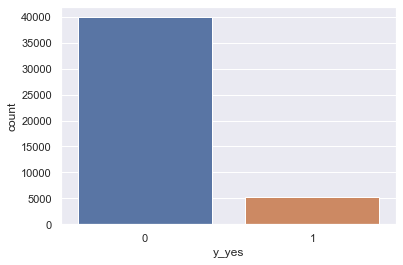

In [30]:
# making a count plot for Y column 
sns.set()
sns.countplot("y_yes",data=df)

In [33]:
# checking no of parcentage yes and no
countyes=len(df[df.y_yes=='yes'])
countno= len(df[df.y_yes=='no'])
print(f'parcentage of yes---->',countyes/len(df.y_yes)*100)
print(f'parcentage of no---->',countno/len(df.y_yes)*100)

parcentage of yes----> 0.0
parcentage of no----> 0.0


In [14]:
x=df[['age', 'balance', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous']]
y=df['y_yes']

# Splitting data into training and testing sets
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [36]:
# Replacing categorical columns 
df.replace({'y_yes':{'no':0,'yes':1}},inplace=True)

<AxesSubplot:xlabel='age', ylabel='Density'>

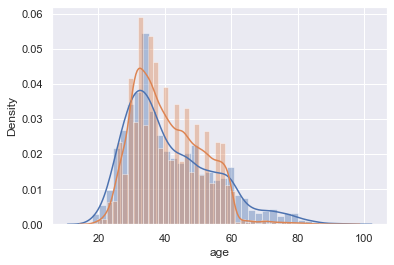

In [37]:
sns.distplot(df['age'][df['y_yes']==1])
sns.distplot(df['age'][df['y_yes']==0])

<AxesSubplot:xlabel='age', ylabel='count'>

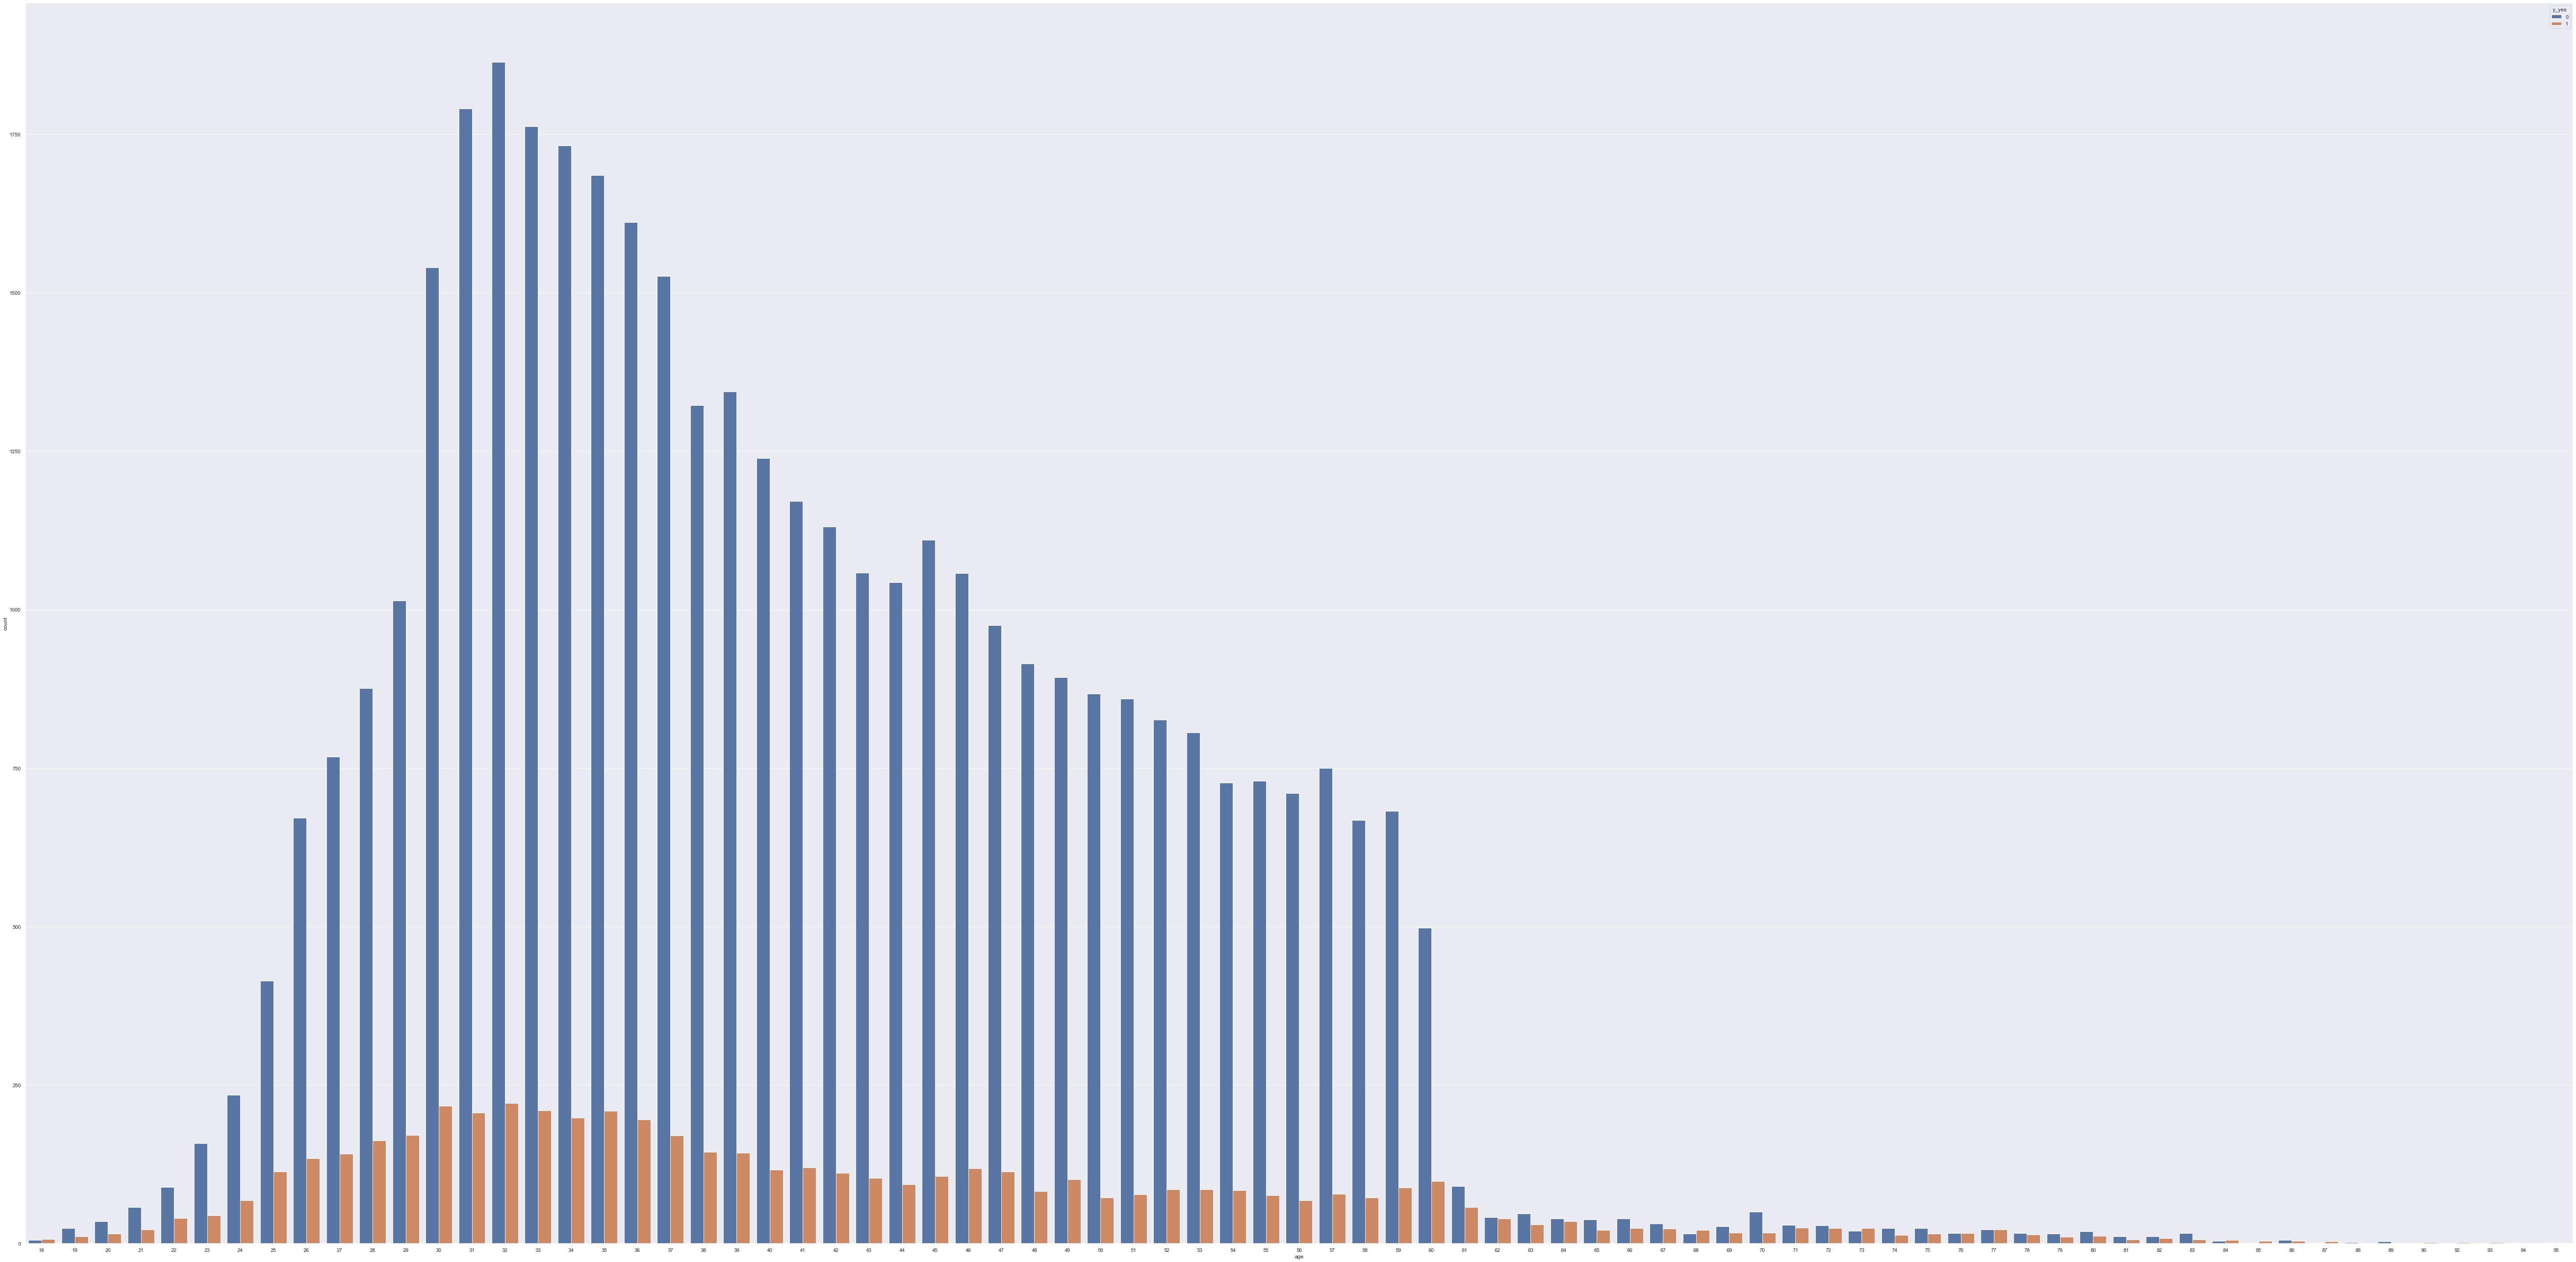

In [39]:
# no of y Age base
plt.figure(figsize=(100,50))
sns.countplot('age',hue='y_yes',data=df)

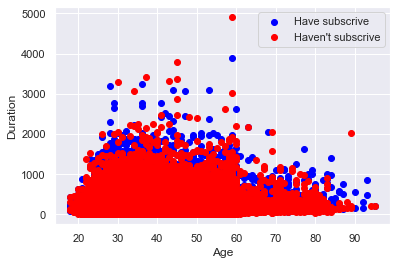

In [40]:
plt.scatter(x=df.age[df.y_yes==1],y=df.duration[df.y_yes==1],c='blue')
plt.scatter(x=df.age[df.y_yes==0],y=df.duration[df.y_yes==0],c='red')
plt.legend(['Have subscrive' , "Haven't subscrive"])
plt.xlabel('Age')
plt.ylabel('Duration')
plt.show()

In [42]:
# checking parcentage of people y in age
df.groupby(['age'])['y_yes'].mean()

age
18    0.583333
19    0.314286
20    0.300000
21    0.278481
22    0.310078
        ...   
90    1.000000
92    1.000000
93    1.000000
94    0.000000
95    0.500000
Name: y_yes, Length: 77, dtype: float64

<AxesSubplot:xlabel='job', ylabel='count'>

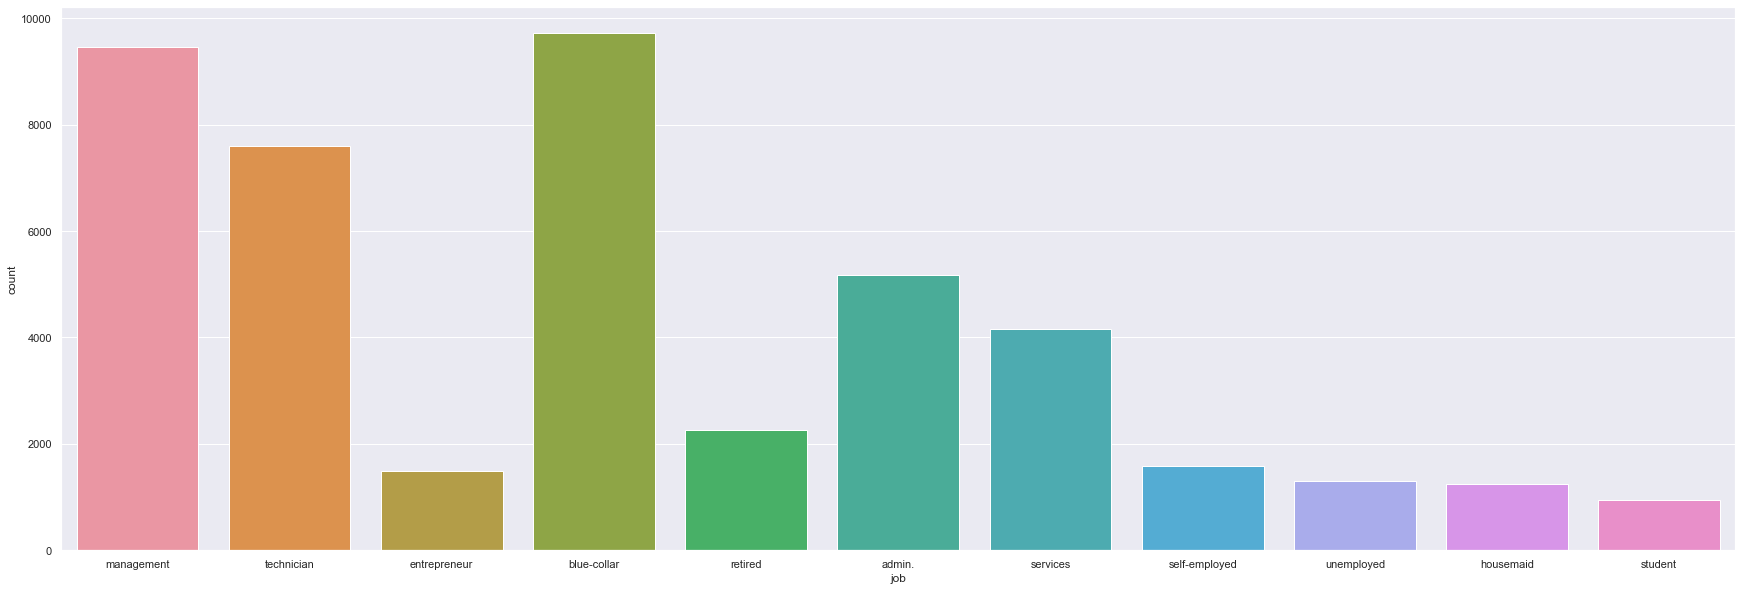

In [43]:
df['job'].value_counts()# making a count plot for job column 
plt.figure(figsize=(30,10))
sns.countplot("job",data=df)

<AxesSubplot:xlabel='job', ylabel='count'>

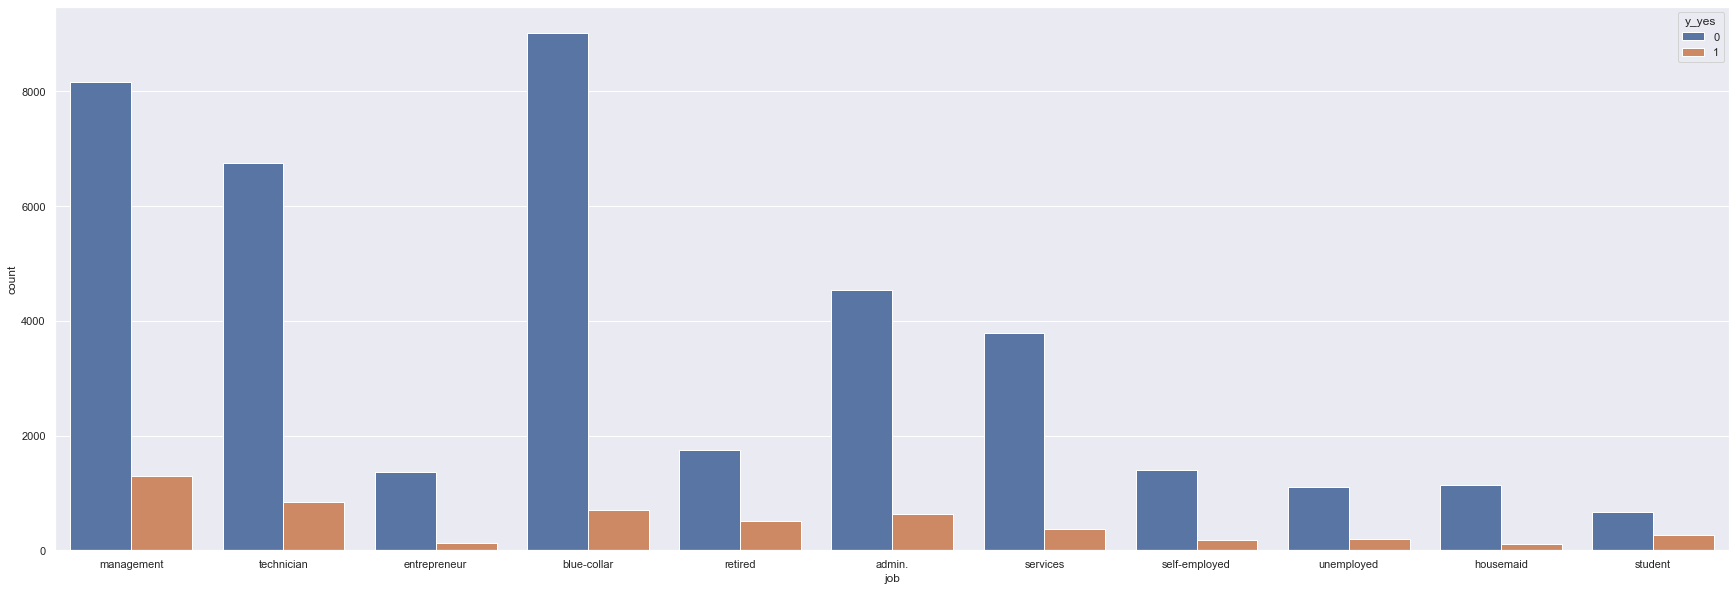

In [44]:
# no of y job base
plt.figure(figsize=(30,10))
sns.countplot('job',hue='y_yes',data=df)

In [48]:
# checking parcentage of people y in job
df.groupby(['job'])['y_yes'].mean()

job
admin.           0.122027
blue-collar      0.072750
entrepreneur     0.082717
housemaid        0.087903
management       0.137556
retired          0.227915
self-employed    0.118429
services         0.088830
student          0.286780
technician       0.110570
unemployed       0.155027
Name: y_yes, dtype: float64

<AxesSubplot:xlabel='marital', ylabel='count'>

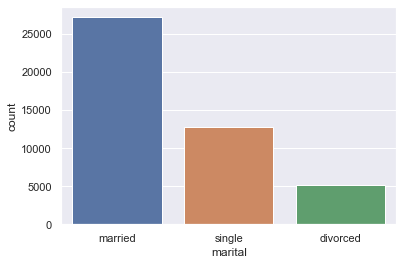

In [49]:
# making a count plot for marital column 
sns.countplot("marital",data=df)

<AxesSubplot:xlabel='marital', ylabel='count'>

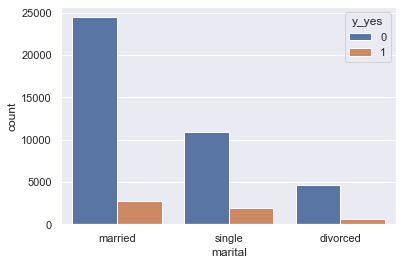

In [50]:
# no of y marital base
sns.countplot('marital',hue='y_yes',data=df)

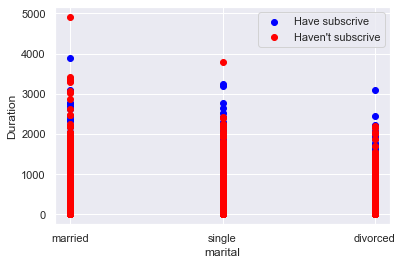

In [51]:
# plt.figure(figsize=(15,8))
plt.scatter(x=df.marital[df.y_yes==1],y=df.duration[df.y_yes==1],c='blue')
plt.scatter(x=df.marital[df.y_yes==0],y=df.duration[df.y_yes==0],c='red')
plt.legend(['Have subscrive' , "Haven't subscrive"])
plt.xlabel('marital')
plt.ylabel('Duration')
plt.show()

In [52]:
# checking parcentage of people y in marital
df.groupby(['marital'])['y_yes'].mean()

marital
divorced    0.119455
married     0.101235
single      0.149492
Name: y_yes, dtype: float64

In [53]:
df['education'].value_counts()

secondary    23202
tertiary     13301
primary       6851
Name: education, dtype: int64

<AxesSubplot:xlabel='education', ylabel='count'>

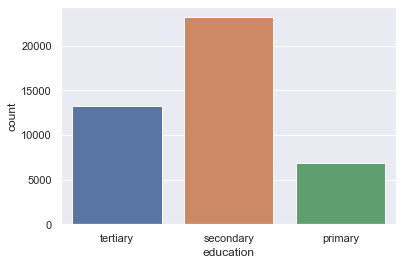

In [54]:
# making a count plot for Y column 
sns.countplot("education",data=df)

<AxesSubplot:xlabel='education', ylabel='count'>

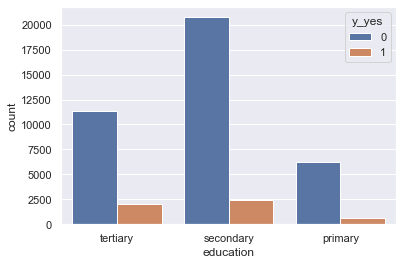

In [55]:
# no of y education base
sns.countplot('education',hue='y_yes',data=df)

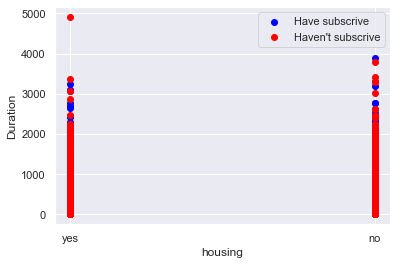

In [56]:
plt.scatter(x=df.housing[df.y_yes==1],y=df.duration[df.y_yes==1],c='blue')
plt.scatter(x=df.housing[df.y_yes==0],y=df.duration[df.y_yes==0],c='red')
plt.legend(['Have subscrive' , "Haven't subscrive"])
plt.xlabel('housing')
plt.ylabel('Duration')
plt.show()

In [57]:
# checking parcentage of people y in housing
df.groupby(['housing'])['y_yes'].mean()

housing
no     0.167024
yes    0.077000
Name: y_yes, dtype: float64

In [58]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day_of_week', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'y_yes'],
      dtype='object')

<AxesSubplot:xlabel='loan', ylabel='count'>

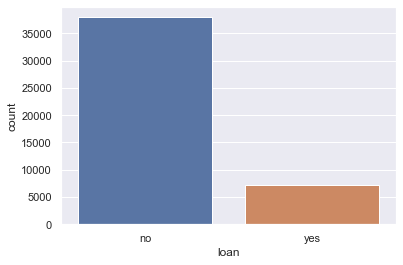

In [59]:
# making a count plot for loan column 
sns.countplot("loan",data=df)

<AxesSubplot:xlabel='loan', ylabel='count'>

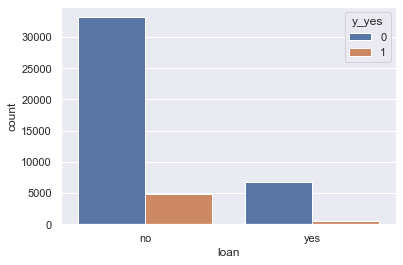

In [60]:
# no of y loan base
sns.countplot('loan',hue='y_yes',data=df)

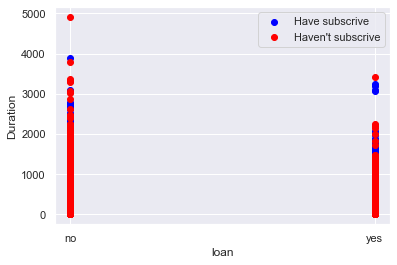

In [61]:
plt.scatter(x=df.loan[df.y_yes==1],y=df.duration[df.y_yes==1],c='blue')
plt.scatter(x=df.loan[df.y_yes==0],y=df.duration[df.y_yes==0],c='red')
plt.legend(['Have subscrive' , "Haven't subscrive"])
plt.xlabel('loan')
plt.ylabel('Duration')
plt.show()


In [63]:
# checking parcentage of people y in loan
df.groupby(['loan'])['y_yes'].mean()

loan
no     0.126557
yes    0.066814
Name: y_yes, dtype: float64

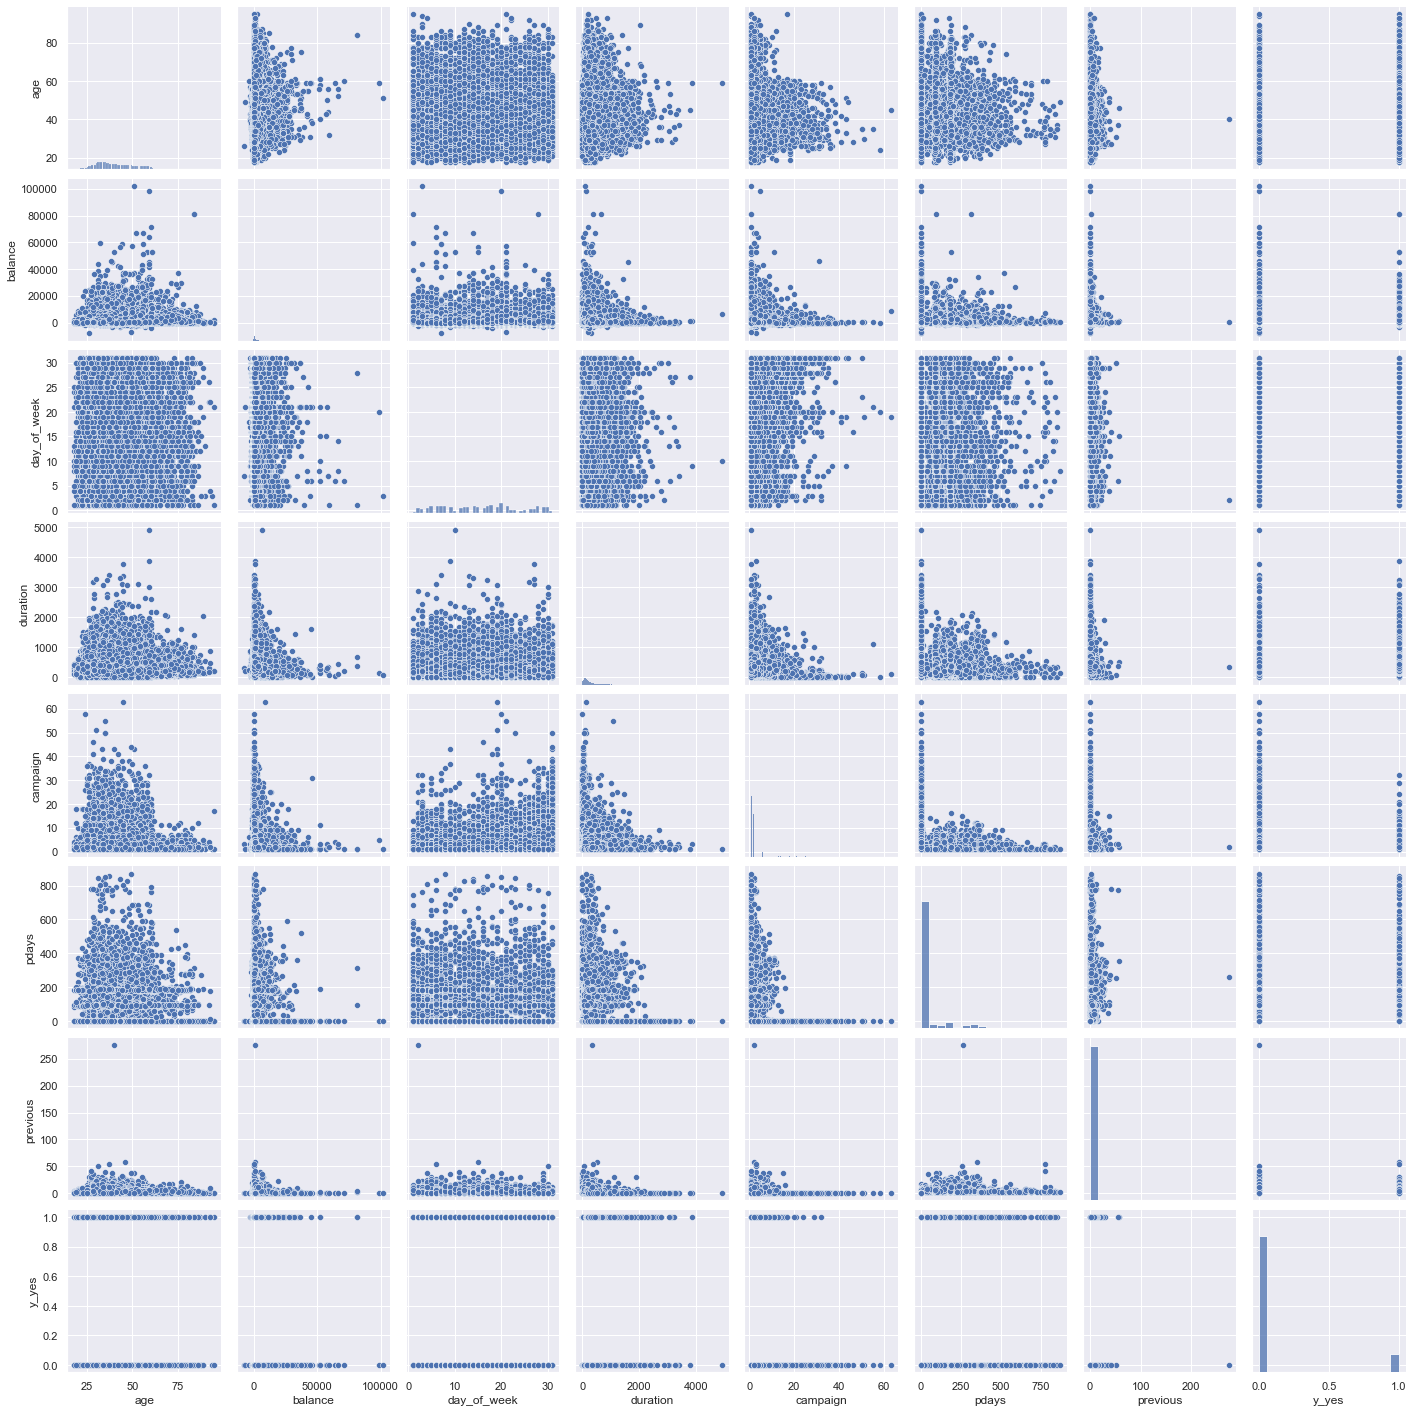

In [64]:
sns.pairplot(data=df)

In [65]:
# sns.pairplot(data=df,hue='y',vars=['age','job','marital','education','housing','loan','balance','duration'])

<AxesSubplot:>

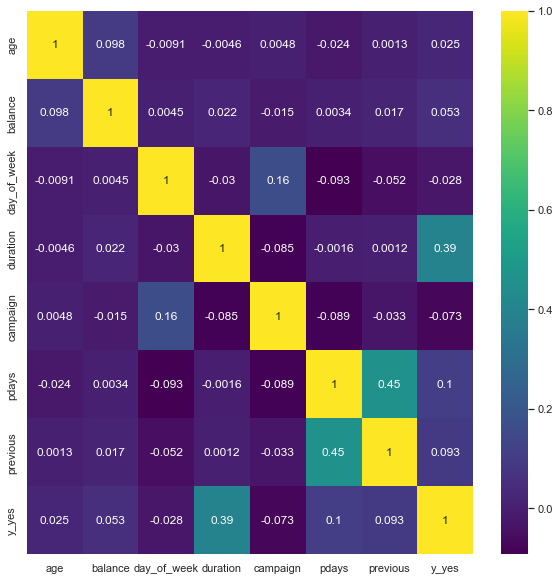

In [66]:
plt.figure(figsize=(10,10))
sns.heatmap(data=df.corr(),annot=True,cmap='viridis')

In [67]:
df.corr()

,age,balance,day_of_week,duration,campaign,pdays,previous,y_yes
age,1.000000,0.097783,-0.009120,-0.004648,0.004760,-0.023758,0.001288,0.025155
balance,0.097783,1.000000,0.004503,0.021560,-0.014578,0.003435,0.016674,0.052838
day_of_week,-0.009120,0.004503,1.000000,-0.030206,0.162490,-0.093044,-0.051710,-0.028348
duration,-0.004648,0.021560,-0.030206,1.000000,-0.084570,-0.001565,0.001203,0.394521
campaign,0.004760,-0.014578,0.162490,-0.084570,1.000000,-0.088628,-0.032855,-0.073172
pdays,-0.023758,0.003435,-0.093044,-0.001565,-0.088628,1.000000,0.454820,0.103621
previous,0.001288,0.016674,-0.051710,0.001203,-0.032855,0.454820,1.000000,0.093236
y_yes,0.025155,0.052838,-0.028348,0.394521,-0.073172,0.103621,0.093236,1.000000


In [68]:
df.sample(4)

,age,job,marital,education,default,balance,housing,loan,contact,day_of_week,month,duration,campaign,pdays,previous,poutcome,y_yes
29281,31,management,married,tertiary,no,4015,yes,no,cellular,2,feb,95,2,241,3,other,0
1860,37,technician,married,tertiary,no,447,yes,no,NaN,9,may,1170,1,-1,0,NaN,0
44453,29,housemaid,single,tertiary,no,2196,no,no,cellular,5,aug,215,1,-1,0,NaN,1
29155,36,admin.,married,secondary,no,131,yes,no,cellular,2,feb,83,1,-1,0,NaN,0


# encoding

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          45211 non-null  int64 
 1   job          44923 non-null  object
 2   marital      45211 non-null  object
 3   education    43354 non-null  object
 4   default      45211 non-null  object
 5   balance      45211 non-null  int64 
 6   housing      45211 non-null  object
 7   loan         45211 non-null  object
 8   contact      32191 non-null  object
 9   day_of_week  45211 non-null  int64 
 10  month        45211 non-null  object
 11  duration     45211 non-null  int64 
 12  campaign     45211 non-null  int64 
 13  pdays        45211 non-null  int64 
 14  previous     45211 non-null  int64 
 15  poutcome     8252 non-null   object
 16  y_yes        45211 non-null  uint8 
dtypes: int64(7), object(9), uint8(1)
memory usage: 5.6+ MB


In [70]:
# Encoding categorical columns
df['job'].value_counts()

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
Name: job, dtype: int64

In [71]:
# Encoding categorical columns
df['marital'].value_counts()

married     27214
single      12790
divorced     5207
Name: marital, dtype: int64

In [73]:
# Encoding categorical columns
df['education'].value_counts()

secondary    23202
tertiary     13301
primary       6851
Name: education, dtype: int64

In [74]:
# Encoding categorical columns
df['default'].value_counts()

no     44396
yes      815
Name: default, dtype: int64

In [75]:
# Encoding categorical columns
df['housing'].value_counts()

yes    25130
no     20081
Name: housing, dtype: int64

In [76]:
# Encoding categorical columns
df['loan'].value_counts()

no     37967
yes     7244
Name: loan, dtype: int64

In [77]:
# Replacing all categorical columns 
df.replace({'job':{ 'blue-collar' : 0,
                    'management'  : 1,    
                   'technician'   : 2,
                    'admin.'      : 3, 
                    'services'    : 4,
                    'retired'     : 5,
                    'self-employed':6,
                    'entrepreneur' :7,
                    'unemployed'   :8,
                    'housemaid'    :9,
                    'student'      :10,
                    'unknown'      :11, },
            'marital':{'married':0,'single':1,'divorced':2},
            'education':{'secondary':0,'tertiary':1,'primary':2,'unknown':3},
            'default':{'no':0,'yes':1},
            'housing':{'no':0,'yes':1},
            'loan':{'no':0,'yes':1}
                      },inplace=True)

In [80]:
# Drop columns
df.drop(columns=['contact','day_of_week','month','poutcome'],inplace=True)

In [81]:
df.sample(5)

,age,job,marital,education,default,balance,housing,loan,duration,campaign,pdays,previous,y_yes
15301,51,2.0,0,0.0,0,428,0,1,145,2,-1,0,0
5182,49,0.0,0,0.0,0,1568,0,0,206,6,-1,0,0
1857,28,0.0,1,0.0,0,7,1,1,125,3,-1,0,0
33554,43,4.0,2,0.0,0,-287,1,0,580,4,-1,0,0
29374,46,2.0,0,0.0,0,1028,1,0,96,2,208,1,0


# pre-modeling

In [83]:
x=df.drop(columns=['y_yes'])
y=df.y_yes

In [84]:
x.shape

(45211, 12)

In [85]:
y.shape

(45211,)

In [86]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=10)

In [93]:
# Example for handling missing values in x_train
x_train = x_train.fillna(x_train.mean())  # Replace NaN with the mean of the column

In [101]:
x_test = x_test.fillna(x_test.mean())  # Replace NaN with the mean of the column

In [94]:
import numpy as np

# Check for NaN and infinite values in x_train
print(np.isnan(x_train).any())
print(np.isinf(x_train).any())

age          False
job          False
marital      False
education    False
default      False
balance      False
housing      False
loan         False
duration     False
campaign     False
pdays        False
previous     False
dtype: bool
age          False
job          False
marital      False
education    False
default      False
balance      False
housing      False
loan         False
duration     False
campaign     False
pdays        False
previous     False
dtype: bool


In [95]:
# Example for converting data type to 'float32'
x_train = x_train.astype('float32')

In [96]:
# Example for removing rows with NaN values
x_train = x_train.dropna()

# Using RandomForestClassifier

In [99]:
Rm = RandomForestClassifier() 
Rm.fit(x_train,y_train)

RandomForestClassifier()

In [102]:
Rm.score(x_test,y_test)

0.8957204467543957

In [103]:
train_score = Rm.score(x_train,y_train)
print(train_score)

test_score = Rm.score(x_test,y_test)
print(test_score)

1.0
0.8957204467543957


In [104]:
print(classification_report(y_test,Rm.predict(x_test)))

              precision    recall  f1-score   support

           0       0.92      0.97      0.94      7994
           1       0.58      0.35      0.44      1049

    accuracy                           0.90      9043
   macro avg       0.75      0.66      0.69      9043
weighted avg       0.88      0.90      0.88      9043



In [105]:
print(confusion_matrix(y_test,Rm.predict(x_test)))

[[7733  261]
 [ 682  367]]


# Using DecisionTreeClassifier

In [106]:
Dc = DecisionTreeClassifier()
Dc.fit(x_train,y_train)

DecisionTreeClassifier()

In [107]:
y_pred = Dc.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=uint8)

In [108]:
# Testing Data Evaluation 

y_pred = Dc.predict(x_test)

cm = confusion_matrix(y_test,y_pred)
print(f"Confusion Matrix =\n",cm)
print("*"*50)
ac = accuracy_score(y_test,y_pred)
print(f"Accuracy Score = {ac}")
print("*"*50)
cr = classification_report(y_test,y_pred)
print(f"Classification report= \n{cr}")

Confusion Matrix =
 [[7292  702]
 [ 640  409]]
**************************************************
Accuracy Score = 0.8515979210439013
**************************************************
Classification report= 
              precision    recall  f1-score   support

           0       0.92      0.91      0.92      7994
           1       0.37      0.39      0.38      1049

    accuracy                           0.85      9043
   macro avg       0.64      0.65      0.65      9043
weighted avg       0.86      0.85      0.85      9043



In [109]:
# Training Data Evaluation 

y_pred = Dc.predict(x_train)

cm = confusion_matrix(y_train,y_pred)
print(f"Confusion Matrix =\n",cm)
print("*"*50)
ac = accuracy_score(y_train,y_pred)
print(f"Accuracy Score = {ac}")
print("*"*50)
cr = classification_report(y_train,y_pred)
print(f"Classification report= \n{cr}")

Confusion Matrix =
 [[31928     0]
 [    0  4240]]
**************************************************
Accuracy Score = 1.0
**************************************************
Classification report= 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     31928
           1       1.00      1.00      1.00      4240

    accuracy                           1.00     36168
   macro avg       1.00      1.00      1.00     36168
weighted avg       1.00      1.00      1.00     36168



In [110]:
# bias - Variance Tradeoff 

# bias >> low
# variance >> high

# Overfitting

# Randomized search

In [112]:
DC= DecisionTreeClassifier(min_samples_split =  15,min_samples_leaf =  16,max_depth=3,criterion='gini')

In [113]:
DC.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=16, min_samples_split=15)

In [114]:
# Testing Data Evaluation 

y_pred = DC.predict(x_test)

cm = confusion_matrix(y_test,y_pred)
print(f"Confusion Matrix =\n",cm)
print("*"*50)
ac = accuracy_score(y_test,y_pred)
print(f"Accuracy Score = {ac}")
print("*"*50)
cr = classification_report(y_test,y_pred)
print(f"Classification report= \n{cr}")

Confusion Matrix =
 [[7774  220]
 [ 792  257]]
**************************************************
Accuracy Score = 0.8880902355413026
**************************************************
Classification report= 
              precision    recall  f1-score   support

           0       0.91      0.97      0.94      7994
           1       0.54      0.24      0.34      1049

    accuracy                           0.89      9043
   macro avg       0.72      0.61      0.64      9043
weighted avg       0.86      0.89      0.87      9043



In [115]:
# Training Data Evaluation 

y_pred = DC.predict(x_train)

cm = confusion_matrix(y_train,y_pred)
print(f"Confusion Matrix =\n",cm)
print("*"*50)
ac = accuracy_score(y_train,y_pred)
print(f"Accuracy Score = {ac}")
print("*"*50)
cr = classification_report(y_train,y_pred)
print(f"Classification report= \n{cr}")

Confusion Matrix =
 [[31119   809]
 [ 3169  1071]]
**************************************************
Accuracy Score = 0.8900132714001328
**************************************************
Classification report= 
              precision    recall  f1-score   support

           0       0.91      0.97      0.94     31928
           1       0.57      0.25      0.35      4240

    accuracy                           0.89     36168
   macro avg       0.74      0.61      0.64     36168
weighted avg       0.87      0.89      0.87     36168



In [116]:
# Bias >> low 
# variance >> low

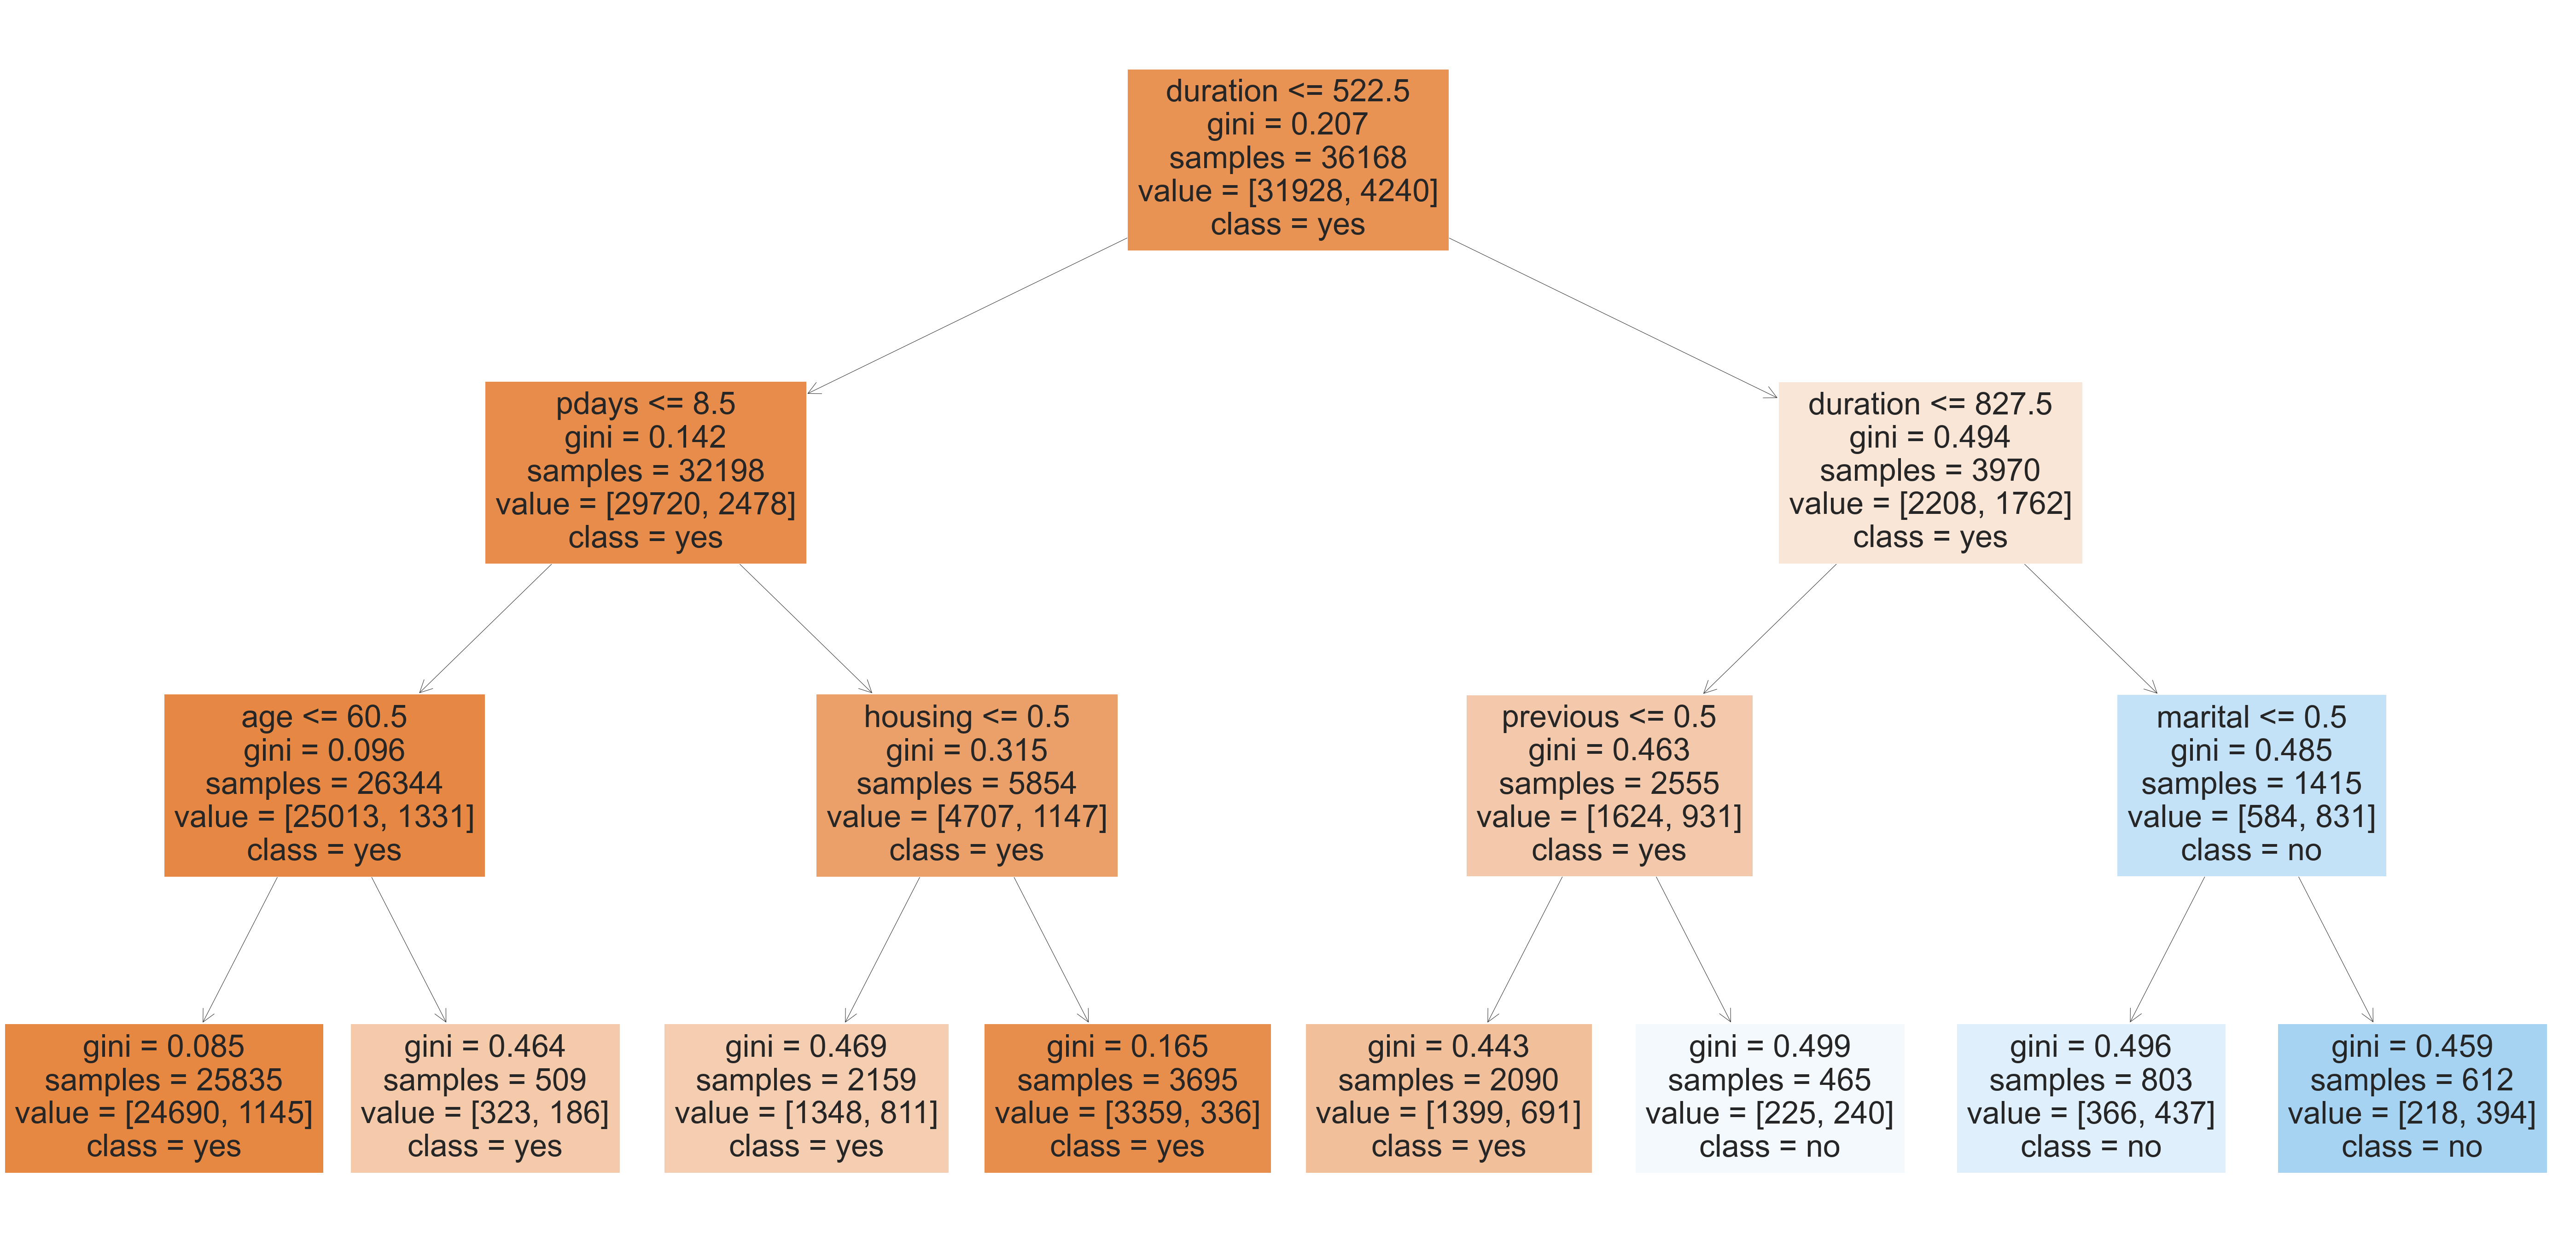

In [117]:
plt.figure(figsize=(100,50))
tree_fig = plot_tree(DC, feature_names=x.columns, filled=True, class_names=['yes','no'])
plt.savefig("decision_tree2.png")

# Save Model File

In [118]:
with open('model.pkl','wb') as file: 
    pickle.dump(DC,file)

# Read pickle file

In [119]:
pkl=pd.read_pickle('model.pkl')
pkl

DecisionTreeClassifier(max_depth=3, min_samples_leaf=16, min_samples_split=15)

# Thank you